In [21]:
!curl --location 'https://api.aliagents.ai/ali-stats/' \
--header 'service-key: 6d4aa41d-46b8-4a96-92ef-0837533a2e3d'

{"tokens_to_credits":{"03-05-2024":601.0,"02-05-2024":8479.5666,"01-05-2024":1875.3245,"30-04-2024":2121.0015,"29-04-2024":2525.0093,"28-04-2024":1060.0,"27-04-2024":1237.0109,"26-04-2024":2095.002,"25-04-2024":1085.0,"24-04-2024":1323.0,"23-04-2024":914.816,"22-04-2024":585.0,"21-04-2024":3250.844,"20-04-2024":975.0,"19-04-2024":1000.0,"18-04-2024":824.8650667328508,"17-04-2024":2532.891,"16-04-2024":1240.0,"15-04-2024":1400.0,"14-04-2024":1840.0,"13-04-2024":1700.0,"12-04-2024":1650.0,"11-04-2024":1620.0,"10-04-2024":1025.0,"09-04-2024":2049.0008,"08-04-2024":1906.0,"07-04-2024":805.25,"06-04-2024":972.0,"05-04-2024":2351.288,"04-04-2024":1131.6},"lb_rewards":{"04-04-2024":7220,"05-04-2024":10715,"06-04-2024":10830,"07-04-2024":9540,"08-04-2024":13040,"09-04-2024":10640,"10-04-2024":9365,"11-04-2024":12315,"12-04-2024":10920,"13-04-2024":10630,"14-04-2024":12610,"15-04-2024":16140,"16-04-2024":11605,"17-04-2024":14925,"18-04-2024":8370,"19-04-2024":6020,"20-04-2024":1330,"21-04-2024"

In [26]:
import pandas as pd
from dune_client.client import DuneClient
import requests
import pandas as pd

dune_api_key = "gqBRKclPQMlU9Jm009ikKIrYV4gWhtuq"
dune = DuneClient(dune_api_key)

def fetch_query_result_to_dataframe(query_id):
    query_result = dune.get_latest_result(query_id)
    if query_result.result.rows:
        # Convert the list of dictionaries into a DataFrame
        df = pd.DataFrame(query_result.result.rows)
        return df
    else:
        return pd.DataFrame()  # Return an empty DataFrame if there are no rows


def get_backend_data():
    url = 'https://api.aliagents.ai/ali-stats/'

    # Headers containing the service key
    headers = {
        'service-key': '6d4aa41d-46b8-4a96-92ef-0837533a2e3d'
    }

    # Make the GET request
    response = requests.get(url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        # Assuming the data is in JSON format and suitable for direct DataFrame loading
        data = response.json()
        
        # Convert the JSON data to DataFrame
        df = pd.DataFrame(data)
        
        return df
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}, Message: {response.text}")

        return pd.DataFrame()


keys_bought_ali_spent_df = fetch_query_result_to_dataframe(3668396)
bc_tvl_df = fetch_query_result_to_dataframe(3665529)
backend_df=get_backend_data()


In [27]:
keys_bought_ali_spent_df['date'] = pd.to_datetime(keys_bought_ali_spent_df['trade_date'])
bc_tvl_df['date'] = pd.to_datetime(bc_tvl_df['date'])


backend_df.reset_index(inplace=True)
backend_df.rename(columns={'index': 'date'}, inplace=True)
backend_df['date'] = pd.to_datetime(backend_df['date'], errors='coerce')

# Convert timezone-aware to timezone-naive by removing timezone (UTC)
#keys_bought_ali_spent_df['date'] = keys_bought_ali_spent_df['date'].dt.tz_localize(None)
#bc_tvl_df['date'] = bc_tvl_df['date'].dt.tz_localize(None)
#backend_df['date'] = backend_df['date'].dt.tz_localize(None)


# Merging the DataFrames on the 'date' column
combined_df = pd.merge(keys_bought_ali_spent_df, bc_tvl_df, on='date', how='outer')

combined_df = pd.merge(combined_df, backend_df, on='date', how='outer')

# Sorting the resulting DataFrame by date to make the data easier to understand
combined_df = combined_df.sort_values(by='date', ascending=False)

# Optionally, you can fill NaN values with 0 or any other appropriate value if there are mismatched dates
combined_df.fillna(0, inplace=True)

file_path = '/mnt/d/Code/track_ali_token_metrics/combined_data_2.csv'

# Save the DataFrame to a CSV file at the specified path
combined_df.to_csv(file_path, index=False)

ValueError: You are trying to merge on datetime64[ns, UTC] and datetime64[ns] columns for key 'date'. If you wish to proceed you should use pd.concat

In [15]:
combined_df.head(30)

,cumulative_spent_ali,cumulative_spent_usd,total_spent_ali,total_spent_usd,trade_date,date,TVLALI,TVL_USD,tokens_to_credits,lb_rewards
62,0.0000,0.000000,0.0000,0.000000,0,2024-12-04 00:00:00,0.000000e+00,0.000000,1650.0000,0.000000
61,0.0000,0.000000,0.0000,0.000000,0,2024-11-04 00:00:00,0.000000e+00,0.000000,1620.0000,55.833333
60,0.0000,0.000000,0.0000,0.000000,0,2024-10-04 00:00:00,0.000000e+00,0.000000,1025.0000,146.642857
59,0.0000,0.000000,0.0000,0.000000,0,2024-09-04 00:00:00,0.000000e+00,0.000000,2049.0008,690.976190
58,0.0000,0.000000,0.0000,0.000000,0,2024-08-04 00:00:00,0.000000e+00,0.000000,1906.0000,125.337302
57,0.0000,0.000000,0.0000,0.000000,0,2024-07-04 00:00:00,0.000000e+00,0.000000,805.2500,310.476190
56,0.0000,0.000000,0.0000,0.000000,0,2024-06-04 00:00:00,0.000000e+00,0.000000,972.0000,22173.326726
55,0.0000,0.000000,0.0000,0.000000,0,2024-05-04 00:00:00,0.000000e+00,0.000000,2351.2880,8260.638645
54,916469.0625,16651.326397,1970.3125,35.798608,2024-04-30 00:00:00.000 UTC,2024-04-30 00:00:00,1.672652e+04,303.904077,0.0000,0.000000
53,914498.7500,16615.527789,23568.4375,428.214941,2024-04-29 00:00:00.000 UTC,2024-04-29 00:00:00,1.105094e+05,2007.845505,0.0000,0.000000


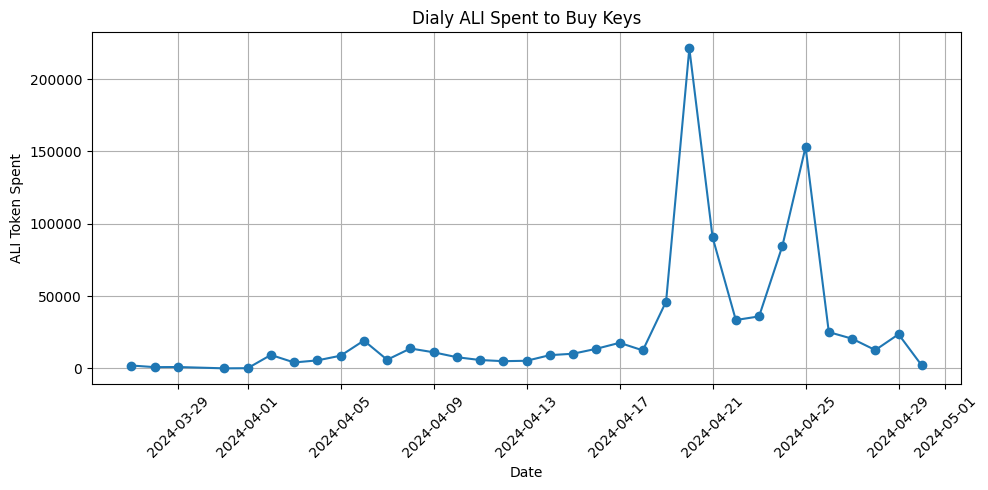

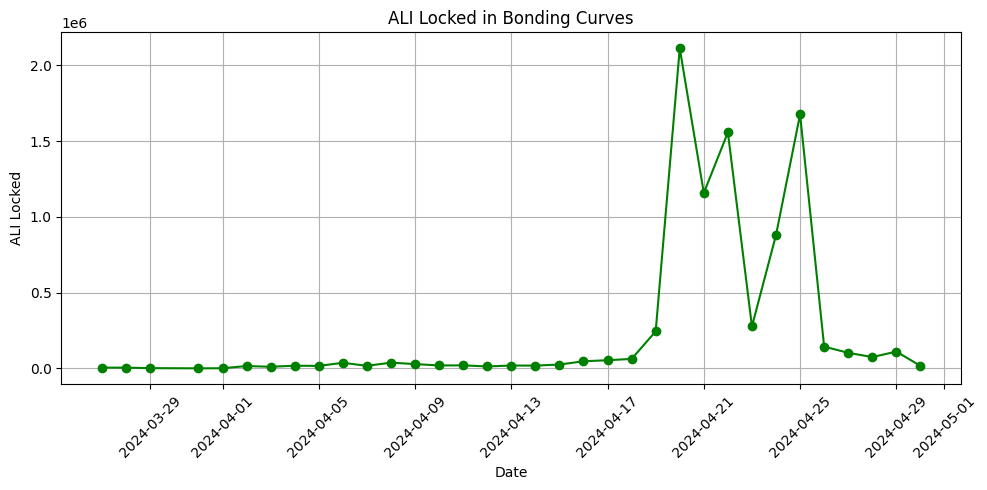

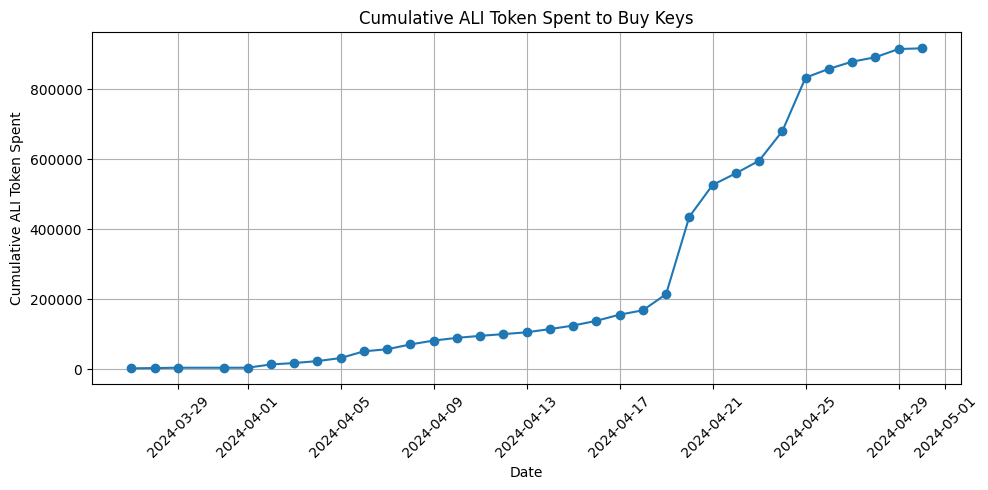

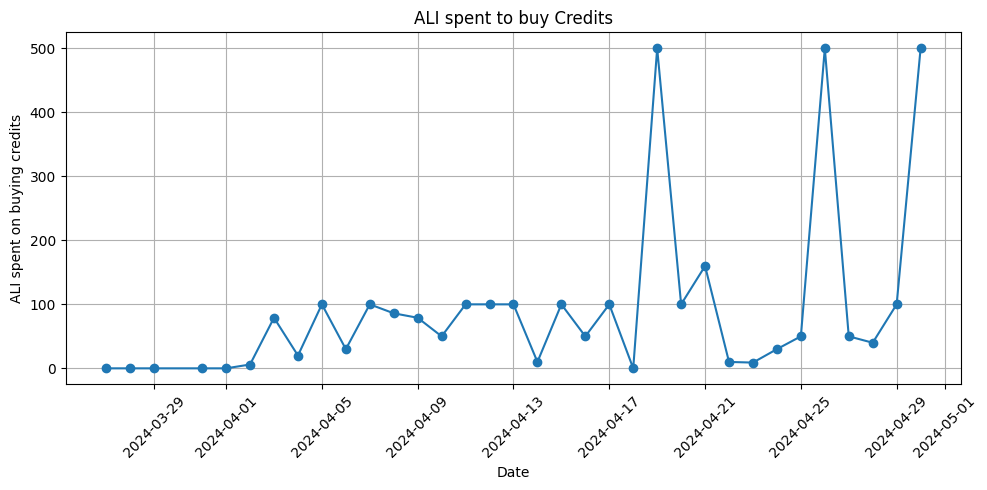

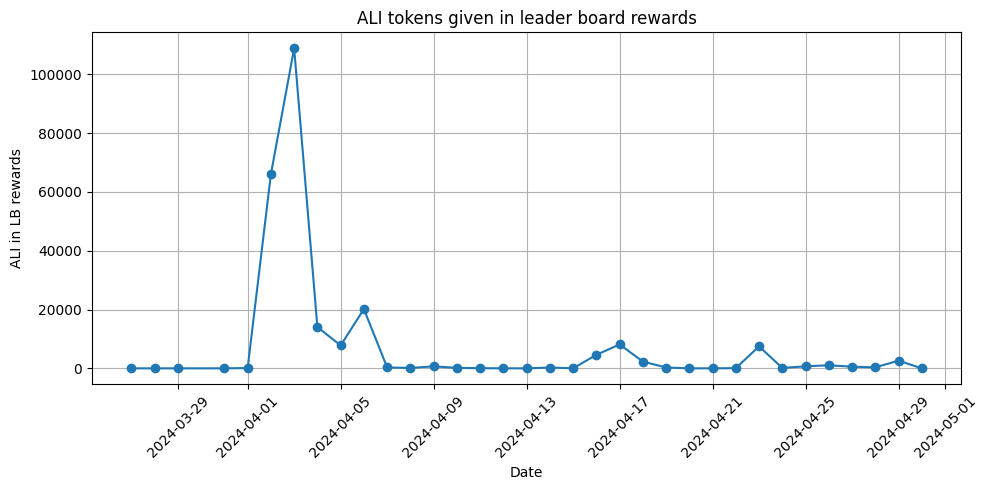

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(combined_df['date'], combined_df['total_spent_ali'], marker='o', linestyle='-')
plt.title('Dialy ALI Spent to Buy Keys')
plt.xlabel('Date')
plt.ylabel('ALI Token Spent')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting total_ali_locked_in_bonding_curves
plt.figure(figsize=(10, 5))
plt.plot(combined_df['date'], combined_df['TVLALI'], marker='o', linestyle='-', color='green')
plt.title('ALI Locked in Bonding Curves')
plt.xlabel('Date')
plt.ylabel('ALI Locked')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(combined_df['date'], combined_df['cumulative_spent_ali'], marker='o', linestyle='-')
plt.title('Cumulative ALI Token Spent to Buy Keys')
plt.xlabel('Date')
plt.ylabel('Cumulative ALI Token Spent')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(combined_df['date'], combined_df['tokens_to_credits'], marker='o', linestyle='-')
plt.title('ALI spent to buy Credits')
plt.xlabel('Date')
plt.ylabel('ALI spent on buying credits')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(combined_df['date'], combined_df['lb_rewards'], marker='o', linestyle='-')
plt.title('ALI tokens given in leader board rewards')
plt.xlabel('Date')
plt.ylabel('ALI in LB rewards')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Advanced plots

In [2]:
import pandas as pd

data=data = pd.read_csv("/mnt/d/Code/track_ali_token_metrics/combined_data.csv")
data_sorted = data.sort_values(by='date', ascending=True)


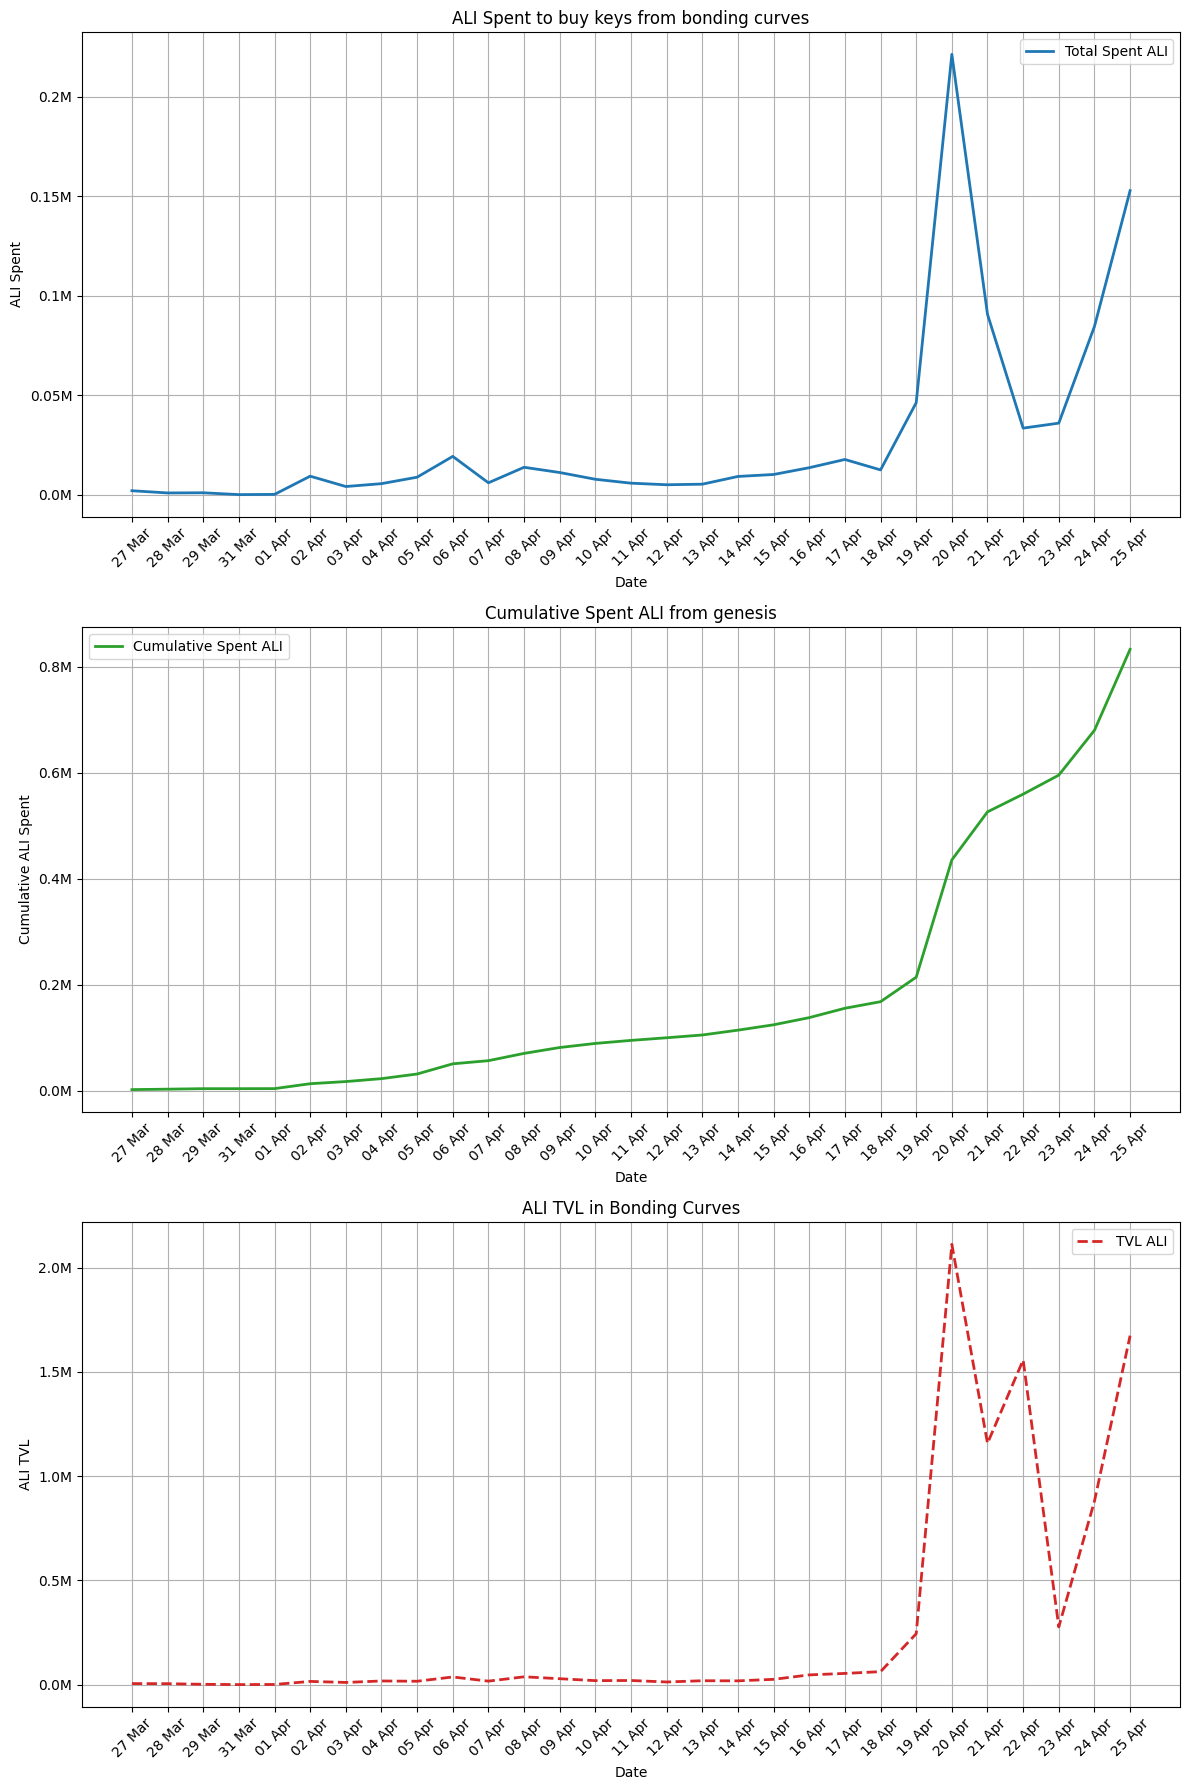

In [3]:
# Improving the readability of the y-axis by formatting values with 'M' for millions
# and cleaning up the x-axis to show dates in "DD Mon" format

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Helper function to format the y-axis values
def millions_formatter(x, pos):
    return f'{x / 1_000_000}M'

# Setting the date format for x-axis
data_sorted['date'] = pd.to_datetime(data_sorted['date']).dt.strftime('%d %b')

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot for total_spent_ali
axs[0].plot(data_sorted['date'], data_sorted['total_spent_ali'], color='tab:blue', label='Total Spent ALI', linewidth=2)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('ALI Spent')
axs[0].set_title('ALI Spent to buy keys from bonding curves')
axs[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axs[0].grid(True)
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)

# Plot for cumulative_spent_ali
axs[1].plot(data_sorted['date'], data_sorted['cumulative_spent_ali'], color='tab:green', label='Cumulative Spent ALI', linewidth=2)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Cumulative ALI Spent')
axs[1].set_title('Cumulative Spent ALI from genesis')
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axs[1].grid(True)
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Plot for TVLALI
axs[2].plot(data_sorted['date'], data_sorted['TVLALI'], color='tab:red', label='TVL ALI', linestyle='--', linewidth=2)
axs[2].set_xlabel('Date')
axs[2].set_ylabel('ALI TVL')
axs[2].set_title('ALI TVL in Bonding Curves')
axs[2].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axs[2].grid(True)
axs[2].legend()
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [4]:
!curl --location 'https://api.aliagents.ai/ali-stats/' \
--header 'service-key: 6d4aa41d-46b8-4a96-92ef-0837533a2e3d'

{"tokens_to_credits":{"30-04-2024":500.0,"29-04-2024":100.0,"28-04-2024":40.0,"27-04-2024":50.0,"26-04-2024":500.0,"25-04-2024":50.0,"24-04-2024":30.0,"23-04-2024":9.0,"22-04-2024":10.0,"21-04-2024":159.844,"20-04-2024":100.0,"19-04-2024":500.0,"18-04-2024":0.009,"17-04-2024":100.0,"16-04-2024":50.0,"15-04-2024":100.0,"14-04-2024":10.0,"13-04-2024":100.0,"12-04-2024":100.0,"11-04-2024":100.0,"10-04-2024":50.0,"09-04-2024":79.0,"08-04-2024":86.0,"07-04-2024":100.0,"06-04-2024":30.0,"05-04-2024":100.0,"04-04-2024":20.0,"03-04-2024":79.0,"02-04-2024":6.0},"lb_rewards":{"30-04-2024":0.0,"29-04-2024":2605.120213120214,"28-04-2024":344.34182046024154,"27-04-2024":557.4134199134201,"26-04-2024":1038.600690975691,"25-04-2024":698.0395591250855,"24-04-2024":128.75,"23-04-2024":7475.46199244213,"22-04-2024":59.395833333333336,"21-04-2024":4.166666666666667,"20-04-2024":11.696428571428571,"19-04-2024":285.72383315917796,"18-04-2024":2308.8580398625363,"17-04-2024":8136.955085271565,"16-04-2024":4

In [3]:
abi='[{"inputs":[{"internalType":"address","name":"_bridge","type":"address"},{"internalType":"address","name":"_remoteToken","type":"address"}],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"spender","type":"address"},{"indexed":false,"internalType":"uint256","name":"oldValue","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"spender","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"authorizer","type":"address"},{"indexed":true,"internalType":"bytes32","name":"nonce","type":"bytes32"}],"name":"AuthorizationCanceled","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"authorizer","type":"address"},{"indexed":true,"internalType":"bytes32","name":"nonce","type":"bytes32"}],"name":"AuthorizationUsed","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"by","type":"address"},{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Burnt","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"source","type":"address"},{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"DelegateChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"by","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Minted","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"_by","type":"address"},{"indexed":true,"internalType":"address","name":"_to","type":"address"},{"indexed":false,"internalType":"uint256","name":"_requested","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_actual","type":"uint256"}],"name":"RoleUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"by","type":"address"},{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"by","type":"address"},{"indexed":true,"internalType":"address","name":"target","type":"address"},{"indexed":false,"internalType":"uint256","name":"fromVal","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"toVal","type":"uint256"}],"name":"VotingPowerChanged","type":"event"},{"inputs":[],"name":"BRIDGE","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"CANCEL_AUTHORIZATION_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"DELEGATION_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"DOMAIN_SEPARATOR","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"DOMAIN_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_BURNS_ON_BEHALF","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_DELEGATIONS","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_DELEGATIONS_ON_BEHALF","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_EIP2612_PERMITS","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_EIP3009_RECEPTIONS","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_EIP3009_TRANSFERS","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_ERC1363_APPROVALS","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_ERC1363_TRANSFERS","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_OWN_BURNS","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_TRANSFERS","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_TRANSFERS_ON_BEHALF","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"FEATURE_UNSAFE_TRANSFERS","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"PERMIT_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"RECEIVE_WITH_AUTHORIZATION_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"REMOTE_TOKEN","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"ROLE_ACCESS_MANAGER","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"ROLE_ERC20_RECEIVER","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"ROLE_ERC20_SENDER","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"ROLE_TOKEN_CREATOR","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"ROLE_TOKEN_DESTROYER","outputs":[{"internalType":"uint32","name":"","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"TOKEN_UID","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"TRANSFER_WITH_AUTHORIZATION_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_owner","type":"address"},{"internalType":"address","name":"_spender","type":"address"}],"name":"allowance","outputs":[{"internalType":"uint256","name":"remaining","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_spender","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"}],"name":"approve","outputs":[{"internalType":"bool","name":"success","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_spender","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"}],"name":"approveAndCall","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_spender","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"},{"internalType":"bytes","name":"_data","type":"bytes"}],"name":"approveAndCall","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_authorizer","type":"address"},{"internalType":"bytes32","name":"_nonce","type":"bytes32"}],"name":"authorizationState","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_owner","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"balance","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"bridge","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_from","type":"address"},{"internalType":"uint256","name":"_amount","type":"uint256"}],"name":"burn","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_authorizer","type":"address"},{"internalType":"bytes32","name":"_nonce","type":"bytes32"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"cancelAuthorization","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_spender","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"}],"name":"decreaseAllowance","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_to","type":"address"}],"name":"delegate","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_to","type":"address"},{"internalType":"bytes32","name":"_nonce","type":"bytes32"},{"internalType":"uint256","name":"_exp","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"delegateWithAuthorization","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"entireSupplyHistory","outputs":[{"components":[{"internalType":"uint64","name":"k","type":"uint64"},{"internalType":"uint192","name":"v","type":"uint192"}],"internalType":"struct AliERC20v2Base.KV[]","name":"","type":"tuple[]"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"operator","type":"address"},{"internalType":"uint256","name":"target","type":"uint256"},{"internalType":"uint256","name":"desired","type":"uint256"}],"name":"evaluateBy","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"features","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_spender","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"}],"name":"increaseAllowance","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"required","type":"uint256"}],"name":"isFeatureEnabled","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"operator","type":"address"},{"internalType":"uint256","name":"required","type":"uint256"}],"name":"isOperatorInRole","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"required","type":"uint256"}],"name":"isSenderInRole","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"l1Token","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"l2Bridge","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_amount","type":"uint256"}],"name":"mint","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"nonces","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_owner","type":"address"},{"internalType":"address","name":"_spender","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"},{"internalType":"uint256","name":"_exp","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"permit","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_from","type":"address"},{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"},{"internalType":"uint256","name":"_validAfter","type":"uint256"},{"internalType":"uint256","name":"_validBefore","type":"uint256"},{"internalType":"bytes32","name":"_nonce","type":"bytes32"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"receiveWithAuthorization","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"remoteToken","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_from","type":"address"},{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"},{"internalType":"bytes","name":"_data","type":"bytes"}],"name":"safeTransferFrom","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"bytes4","name":"interfaceId","type":"bytes4"}],"name":"supportsInterface","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"pure","type":"function"},{"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_blockNum","type":"uint256"}],"name":"totalSupplyAt","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"","type":"uint256"}],"name":"totalSupplyHistory","outputs":[{"internalType":"uint64","name":"k","type":"uint64"},{"internalType":"uint192","name":"v","type":"uint192"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalSupplyHistoryLength","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"}],"name":"transfer","outputs":[{"internalType":"bool","name":"success","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"}],"name":"transferAndCall","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"},{"internalType":"bytes","name":"_data","type":"bytes"}],"name":"transferAndCall","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_from","type":"address"},{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"}],"name":"transferFrom","outputs":[{"internalType":"bool","name":"success","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_from","type":"address"},{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"},{"internalType":"bytes","name":"_data","type":"bytes"}],"name":"transferFromAndCall","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_from","type":"address"},{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"}],"name":"transferFromAndCall","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_from","type":"address"},{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"},{"internalType":"uint256","name":"_validAfter","type":"uint256"},{"internalType":"uint256","name":"_validBefore","type":"uint256"},{"internalType":"bytes32","name":"_nonce","type":"bytes32"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"transferWithAuthorization","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_from","type":"address"},{"internalType":"address","name":"_to","type":"address"},{"internalType":"uint256","name":"_value","type":"uint256"}],"name":"unsafeTransferFrom","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"_mask","type":"uint256"}],"name":"updateFeatures","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"operator","type":"address"},{"internalType":"uint256","name":"role","type":"uint256"}],"name":"updateRole","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"userRoles","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"votingDelegates","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_of","type":"address"},{"internalType":"uint256","name":"_blockNum","type":"uint256"}],"name":"votingPowerAt","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"},{"internalType":"uint256","name":"","type":"uint256"}],"name":"votingPowerHistory","outputs":[{"internalType":"uint64","name":"k","type":"uint64"},{"internalType":"uint192","name":"v","type":"uint192"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_of","type":"address"}],"name":"votingPowerHistoryLength","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_of","type":"address"}],"name":"votingPowerHistoryOf","outputs":[{"components":[{"internalType":"uint64","name":"k","type":"uint64"},{"internalType":"uint192","name":"v","type":"uint192"}],"internalType":"struct AliERC20v2Base.KV[]","name":"","type":"tuple[]"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_of","type":"address"}],"name":"votingPowerOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'

In [23]:
import pandas as pd
from web3 import Web3, HTTPProvider


#w3 = Web3(Web3.HTTPProvider('https://base-mainnet.g.alchemy.com/v2/UizwV-1ZJK9AER1_lKc8lbYvKqysskNB'))
w3 = Web3(HTTPProvider('https://base-mainnet.g.alchemy.com/v2/UizwV-1ZJK9AER1_lKc8lbYvKqysskNB'))

ali_token_address = Web3.to_checksum_address('0x97c806e7665d3afd84a8fe1837921403d59f3dcc')
ali_token_abi = abi  
ali_token_contract = w3.eth.contract(address=ali_token_address, abi=ali_token_abi)
file_path = '/mnt/d/Code/track_ali_token_metrics/key_contracts_list.csv'
df_addresses = pd.read_csv(file_path, header=None)
df_addresses.columns = ['Contract Address'] 
data = {
    'Contract Address': [],
    'ALI Balance': []}

for address in df_addresses['Contract Address']:
    try:
        balance = ali_token_contract.functions.balanceOf(Web3.to_checksum_address(address)).call(block_identifier='latest')
        data['Contract Address'].append(address)
        data['ALI Balance'].append(balance / 1e18) 
    except Exception as e:
        print(f"Error fetching balance for {address}: {e}")

df = pd.DataFrame(data)
print(df.head())
df.to_csv('ali_token_balances.csv', index=False)


Error fetching balance for 0x17652E18ad731937Fa2d060E184de493A1aE23b1: {'code': -32000, 'message': 'header not found'}
Error fetching balance for 0x2413baCc60cAFF2C790EE77006c2A1E1dDefa7c7: {'code': -32000, 'message': 'header not found'}
Error fetching balance for 0x2a3556df17c6e8801EFeD10CDBC93CBB1C466b68: {'code': -32000, 'message': 'header not found'}
Error fetching balance for 0x32a48B8C20E9Daa175fbd5C0955a686fEF8D61Be: {'code': -32000, 'message': 'header not found'}
Error fetching balance for 0x35305Ee558BAe35221844132Ce22893dcf0552aD: {'code': -32000, 'message': 'header not found'}
Error fetching balance for 0x360a06b2C08F3941D3bc5500E0F9696a193c000A: {'code': -32000, 'message': 'header not found'}
Error fetching balance for 0x36e0151558b03De0761FD2d98330d16beB73E9bA: {'code': -32000, 'message': 'header not found'}
Error fetching balance for 0x3D36705EB37DB3145e28E2334b020131218142dd: {'code': -32000, 'message': 'header not found'}
Error fetching balance for 0x3aC82C64D963D774980

In [25]:
total_balance = df['ALI Balance'].sum()
print(f"Total ALI Balance across all key contracts: {total_balance}")


sorted_df = df.sort_values(by='ALI Balance', ascending=False)


print(sorted_df.head())  
sorted_df.to_csv('sorted_ali_token_balances.csv', index=True)


Total ALI Balance across all key contracts: 91772.8125
                                Contract Address  ALI Balance
2652  0x5645397E4F1227DD131ba3422AFc92225694D30a   18786.2500
5011  0xA7a6aF83aAc350acf769244B7fBc27c24f6d3422    9810.9375
4663  0x98a36c733b052F2313c659D158A36687E15F1bAe    5064.3750
4219  0x897191683552B50d8E49BE46BD65A5211d17A90b    2673.4375
4165  0x87a7e67a7eb6BC533d92026f8cb70687eb75C32D    1937.8125
